<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

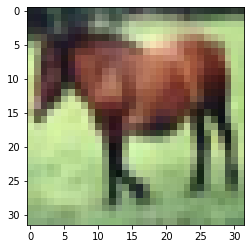

In [9]:
plt.imshow(x_train[7])

In [10]:
x_train = x_train/255
x_test = x_test/255

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,610,026
Trainable params: 1,610,026
Non-trainable params: 0
____________________________________________

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 15s 5ms/step - loss: 1.4458 - accuracy: 0.4844 - val_loss: 1.3223 - val_accuracy: 0.5319
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1384 - accuracy: 0.5966 - val_loss: 1.1822 - val_accuracy: 0.5889
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9863 - accuracy: 0.6516 - val_loss: 1.0930 - val_accuracy: 0.6198
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8544 - accuracy: 0.7000 - val_loss: 1.0490 - val_accuracy: 0.6383
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7352 - accuracy: 0.7442 - val_loss: 1.0526 - val_accuracy: 0.6423
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6269 - accuracy: 0.7822 - val_loss: 1.1167 - val_accuracy: 0.6382


In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.445842,0.48440,1.322260,0.5319
1,1.138423,0.59662,1.182191,0.5889
2,0.986342,0.65158,1.092970,0.6198
3,0.854433,0.70002,1.048982,0.6383
4,0.735170,0.74422,1.052608,0.6423
5,0.626871,0.78222,1.116662,0.6382


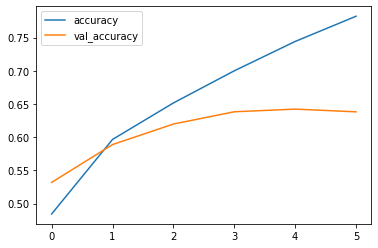

In [34]:
metrics[['accuracy', 'val_accuracy']].plot()

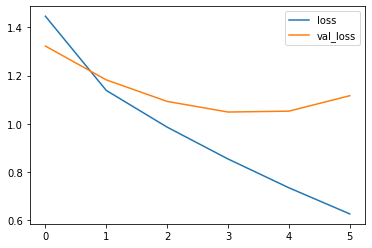

In [35]:
metrics[['loss','val_loss']].plot()

In [36]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1000
           1       0.72      0.82      0.77      1000
           2       0.49      0.54      0.52      1000
           3       0.40      0.52      0.45      1000
           4       0.70      0.41      0.51      1000
           5       0.55      0.50      0.52      1000
           6       0.64      0.78      0.70      1000
           7       0.74      0.69      0.72      1000
           8       0.75      0.80      0.77      1000
           9       0.80      0.61      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



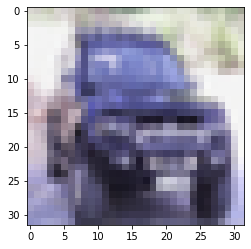

In [48]:
single_image = x_test[9]
plt.imshow(single_image)

In [49]:
y_test[9]

array([1], dtype=uint8)

In [50]:
np.argmax(model.predict(single_image.reshape(1,32,32,3)), axis=-1)

1/1 [==============================] - 0s 69ms/step


array([1])